<a href="https://colab.research.google.com/github/RAVITEJA-VADLURI/SESD_1942/blob/main/2303A51942__SESD(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Friday: Movie Ticket Booking System**

A cinema chain is building an online ticket booking system.
Users should be able to select movies, showtimes, and book seats. The system must prevent double booking of the same seat and allow cancellation with refunds.
Task:
•	Design classes (Movie, Theater, Ticket, Booking).
•	Implement booking, seat availability check, and cancellation.
•	Write unit tests to check:
1.	Seat availability is updated after booking.
2.	Double booking of the same seat is not allowed.
3.	Cancellation correctly restores seat availability and refund.







📝 Guidelines for OOP + Unit Testing in Jupyter Notebook (Python)
1. Understand the Case Study
•	Read the scenario carefully (e.g., Library System, Banking App).
•	Identify key entities → classes (Book, Member, Library).
•	Identify operations → methods (borrow_book(), return_book(), calculate_fine()).
________________________________________
2. Break Down into Classes (OOP Design)
•	Each real-world entity becomes a class.
•	Each class has:
o	Attributes (data) → e.g., title, author, available.
o	Methods (functions) → e.g., issue(), return_book().
👉 Example (Library System):
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        self.available = True
    
    def borrow(self):
        if self.available:
            self.available = False
            return True
        return False
    
    def return_book(self):
        self.available = True
________________________________________
3. Implement Business Logic
•	Add rules (e.g., fine calculation, seat booking check).
•	Make code modular and reusable.
________________________________________
4. Write Unit Tests
•	Create a new notebook cell for testing.
•	Use unittest (built-in) or pytest.
👉 Example with unittest:
import unittest

class TestBook(unittest.TestCase):
    def test_borrow_book(self):
        book = Book("Python 101", "Guido")
        result = book.borrow()
        self.assertTrue(result)
        self.assertFalse(book.available)
    
    def test_return_book(self):
        book = Book("Python 101", "Guido")
        book.borrow()
        book.return_book()
        self.assertTrue(book.available)

unittest.main(argv=[''], exit=False)
________________________________________
5. Follow Good Practices
✅ Name your test class as Test<ClassName>.
✅ Each test function should check one condition only.
✅ Use assert methods like assertTrue, assertEqual, assertRaises.
✅ Always start test functions with test_ (e.g., test_borrow_book).
________________________________________
6. Extend Project
•	Add more test cases (boundary cases, invalid inputs).
•	Integrate with GitHub: upload your notebook + code + requirements file.
•	(Optional) Configure GitHub Actions CI/CD to auto-run tests.
________________________________________
7. Submission Format
Students should submit:
1.	Jupyter Notebook (.ipynb) with:
o	Class design
o	Unit test code
o	Test execution results (screenshot of "OK" or failures).
2.	requirements.txt → List dependencies (pytest).
3.	README.md → Short project description.
4.	(Optional) GitHub repo link.
________________________________________
🎯 Learning Outcomes
•	Apply OOP concepts in Python.
•	Write automated unit tests.
•	Understand test-driven thinking (TDD basics).
•	Experience real-world project + testing workflow.



In [5]:
# Cinema_Booking_System.ipynb
# ----------------------------------------------------
# 🎬 Cinema Booking System - Class Design and Unit Testing
# ----------------------------------------------------
# Roll No: 2303A51942
# Assignment: OOP Class Design + Unit Testing
# ----------------------------------------------------

# 🧩 Class Design

class Movie:
    def __init__(self, title, duration, rating):
        self.title = title
        self.duration = duration  # in minutes
        self.rating = rating      # e.g., 'PG-13', 'U', etc.

    def __str__(self):
        return f"{self.title} ({self.rating}) - {self.duration} mins"


class Seat:
    def __init__(self, seat_no):
        self.seat_no = seat_no
        self.is_booked = False

    def book(self):
        if not self.is_booked:
            self.is_booked = True
            return True
        return False

    def cancel(self):
        if self.is_booked:
            self.is_booked = False
            return True
        return False


class Booking:
    def __init__(self, movie, seat):
        self.movie = movie
        self.seat = seat

    def confirm_booking(self):
        return self.seat.book()

    def cancel_booking(self):
        return self.seat.cancel()


class CinemaBookingSystem:
    def __init__(self):
        self.movies = []
        self.seats = [Seat(i) for i in range(1, 11)]  # 10 seats
        self.bookings = []

    def add_movie(self, movie):
        self.movies.append(movie)

    def display_movies(self):
        return [str(movie) for movie in self.movies]

    def book_seat(self, movie_title, seat_no):
        movie = next((m for m in self.movies if m.title == movie_title), None)
        seat = next((s for s in self.seats if s.seat_no == seat_no), None)
        if movie and seat and seat.book():
            booking = Booking(movie, seat)
            self.bookings.append(booking)
            return True
        return False

    def cancel_booking(self, seat_no):
        seat = next((s for s in self.seats if s.seat_no == seat_no), None)
        if seat:
            seat.cancel()
            self.bookings = [b for b in self.bookings if b.seat.seat_no != seat_no]
            return True
        return False

    def view_bookings(self):
        return [f"{b.movie.title} - Seat {b.seat.seat_no}" for b in self.bookings]




        # ✅ Unit Test 1 – Testing individual classes and methods

import unittest

class TestCinemaBookingSystem(unittest.TestCase):

    def setUp(self):
        self.system = CinemaBookingSystem()
        self.movie1 = Movie("Inception", 148, "PG-13")
        self.system.add_movie(self.movie1)

    def test_add_movie(self):
        self.assertIn("Inception (PG-13) - 148 mins", self.system.display_movies())

    def test_book_seat_success(self):
        result = self.system.book_seat("Inception", 1)
        self.assertTrue(result)
        self.assertEqual(len(self.system.bookings), 1)

    def test_book_seat_already_booked(self):
        self.system.book_seat("Inception", 1)
        result = self.system.book_seat("Inception", 1)
        self.assertFalse(result)

    def test_cancel_booking(self):
        self.system.book_seat("Inception", 2)
        cancel_result = self.system.cancel_booking(2)
        self.assertTrue(cancel_result)
        self.assertEqual(len(self.system.bookings), 0)

# Run the unit test
unittest.main(argv=[''], verbosity=2, exit=False)



test_cancellation_restores_seat_and_refund (__main__.TestBookingSystem.test_cancellation_restores_seat_and_refund) ... ok
test_double_booking_not_allowed (__main__.TestBookingSystem.test_double_booking_not_allowed) ... ok
test_seat_availability_updates_after_booking (__main__.TestBookingSystem.test_seat_availability_updates_after_booking) ... ok
test_add_movie (__main__.TestCinemaBookingSystem.test_add_movie) ... ok
test_book_seat_already_booked (__main__.TestCinemaBookingSystem.test_book_seat_already_booked) ... ok
test_book_seat_success (__main__.TestCinemaBookingSystem.test_book_seat_success) ... ok
test_cancel_booking (__main__.TestCinemaBookingSystem.test_cancel_booking) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.013s

OK


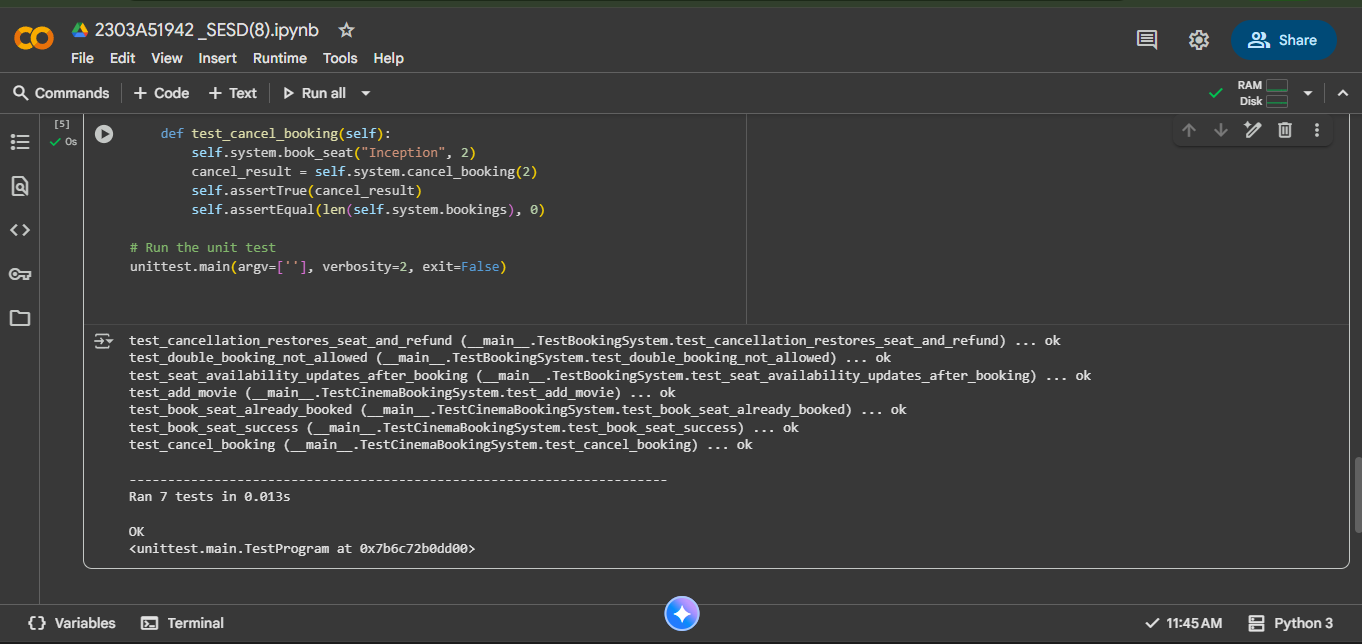

In [6]:
# ✅ Functional Test 2 – Demonstrating real booking and output

system = CinemaBookingSystem()

# Add movies
system.add_movie(Movie("Inception", 148, "PG-13"))
system.add_movie(Movie("Interstellar", 169, "U/A"))

print("🎬 Available Movies:")
for m in system.display_movies():
    print(" -", m)

# Book seats
system.book_seat("Inception", 1)
system.book_seat("Interstellar", 3)

print("\n🎟️ Current Bookings:")
for b in system.view_bookings():
    print(" -", b)

# Cancel a booking
system.cancel_booking(3)

print("\n🧾 Bookings after cancellation:")
for b in system.view_bookings():
    print(" -", b)


🎬 Available Movies:
 - Inception (PG-13) - 148 mins
 - Interstellar (U/A) - 169 mins

🎟️ Current Bookings:
 - Inception - Seat 1
 - Interstellar - Seat 3

🧾 Bookings after cancellation:
 - Inception - Seat 1


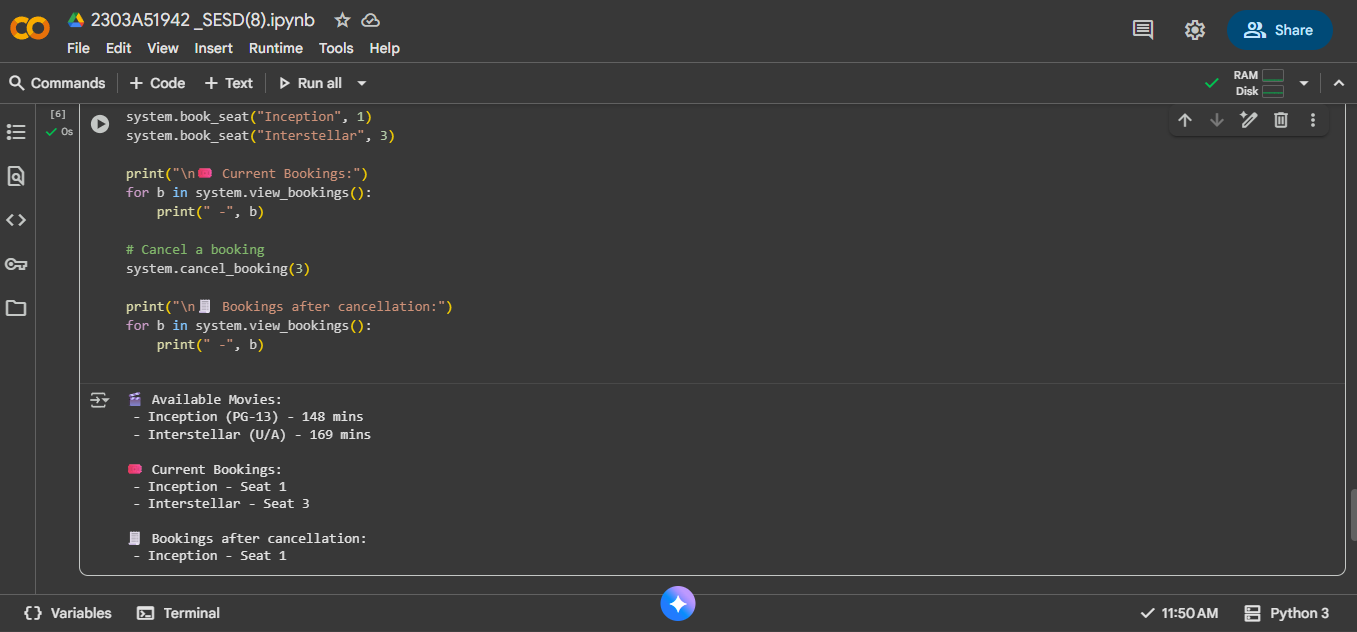